# Lecture 22:  Time-dependent EBM


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
from scipy.integrate import solve_ivp

Set the parameters according to those given in lectures

In [21]:
A = 202 # outgoing radiation
B = 1.9 # outgoing radiation
k = 1.6*B # transport parameter
s = lambda y: 1 - 0.482*(3*y**2 - 1)/2 # solar weighting
aw = 0.32 # water albedo
ai = 0.62 # ice albedo
Tc = -10.0 # critical temperature for ice formation
Q0 = 342.0 # solar constant (1370 W/m^2 divided by 4)

# now corrected to match Q6 of PS4
abar = lambda ys: ai + (aw - ai)*ys*(1 - 0.241*(ys**2 - 1))
Tbar = lambda ys, Q: (Q*(1 - abar(ys)) - A)/B 
Tbari = lambda Q: (Q*(1 - ai)- A)/B
Tbarw = lambda Q: (Q*(1 - aw)- A)/B
Qfunc = lambda ys: (Tc + A/B)*(B+k)/(s(ys)*(1 - (ai+aw)/2) + k/B*(1 - abar(ys)))

def afun(y, ys): 
    # albedo function; if T > Tc, set a = aw, elseif T < Tc, a = ai
    a = 0*y
    for i, yy in enumerate(y):
        if yy < ys:
            aa = aw
        elif yy > ys:
            aa = ai
        else:
            aa = (ai+aw)/2
        a[i] = aa
    return a

def afunT(T): 
    # albedo function; if T > Tc, set a = aw, elseif T < Tc, a = ai
    a = 0*y
    for i, TT in enumerate(T):
        if TT < Tc:
            aa = ai
        elif TT > Tc:
            aa = aw
        else:
            aa = (ai+aw)/2
        a[i] = aa
    return a

def Tbarint(y, T):
    # Riemann sum approximation of the integral T(y) over y    
    I = 0
    for i in range(0, np.size(y)-1):
        dy = y[i+1] - y[i]
        # I = I + T[i]*dy
        # print(i, yi, T[i])
        I = I + 0.5*(T[i] + T[i+1])*dy
    return I

def G(t, T, y, Q):
    C = 1
    dT = 1/C*(Q*s(y)*(1-afunT(T)) - (A+B*T) + k*(Tbarint(y, T) - T))
    return dT

T = lambda y, ys, Q: (k*Tbar(ys,Q) + Q*s(y)*(1 - afun(y,ys)) - A)/(B+k);
T1 = lambda y, Q: Q/(B+k)*(s(y)*(1-aw) + k/B*(1-aw))-A/B;
T2 = lambda y, Q: Q/(B+k)*(s(y)*(1-ai) + k/B*(1-ai))-A/B;

The below code incorporates the script written lecture21 where we solved for the time-independent/steady-state solutions of the EBM

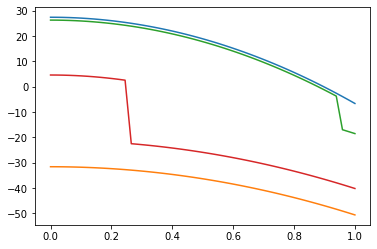

In [36]:
def solveiceline(Q0):
    # Let's plot the solutions at Q = 343
    fwd = lambda ys: Qfunc(ys) - Q0;
    sol = root(fwd, 0.95); ys_stable = sol.x[0];
   
    fwd = lambda ys: Qfunc(ys) - Q0;
    sol = root(fwd, 0.2); ys_unstable = sol.x[0];
    
    return ys_stable, ys_unstable

Q0  = 342
ys_stable, ys_unstable = solveiceline(Q0)

y = np.linspace(0,1,50);
plt.plot(y, T1(y, Q0))
plt.plot(y, T2(y, Q0))
plt.plot(y, T(y, ys_stable, Q0))
plt.plot(y, T(y, ys_unstable, Q0))

tmax = 10
fwd = lambda t, T: G(t, T, y, Q0)
fwd(0, T(y, ys_stable, Q0))
sol = solve_ivp(fwd, [0, tmax], T(y, ys_stable, Q0), dense_output=1)

t_dense = np.linspace(0, tmax, 100)
U = sol.sol(t_dense)
# For each time step, integrate for the average
Wbar = 0*t_dense
Qmat = 0*t_dense + Q0
for i, tt in enumerate(t_dense):
    W = sol.sol(tt)
    Wbar[i] = Tbarint(y, W)

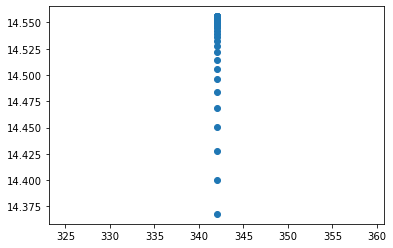

In [41]:
plt.plot(Qmat, Wbar, 'o')

In [39]:
Qmat

array([342., 342., 342., 342., 342., 342., 342., 342., 342., 342., 342.,
       342., 342., 342., 342., 342., 342., 342., 342., 342., 342., 342.,
       342., 342., 342., 342., 342., 342., 342., 342., 342., 342., 342.,
       342., 342., 342., 342., 342., 342., 342., 342., 342., 342., 342.,
       342., 342., 342., 342., 342., 342., 342., 342., 342., 342., 342.,
       342., 342., 342., 342., 342., 342., 342., 342., 342., 342., 342.,
       342., 342., 342., 342., 342., 342., 342., 342., 342., 342., 342.,
       342., 342., 342., 342., 342., 342., 342., 342., 342., 342., 342.,
       342., 342., 342., 342., 342., 342., 342., 342., 342., 342., 342.,
       342.])

In [16]:
plt.plot(y, afunc(T))

NameError: name 'afunc' is not defined